In [1]:
import pandas as pd

In [2]:
gastos_mais_recente = pd.read_csv('dados/gastos_mais_recente.csv')
gastos_mais_recente.head()

,Unidade da Federação,2023/Ago
0,35 São Paulo,400.547554
1,31 Minas Gerais,220.788839
2,41 Paraná,156.008695
3,43 Rio Grande do Sul,117.940448
4,33 Rio de Janeiro,114.395381


In [3]:
dados_ibge = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o')

In [4]:
dados_ibge_tab = dados_ibge[1]
dados_ibge_tab.head()

,Posição,Unidade federativa,População(Censo de 2022)[2],População(Censo de 2010)[3],Mudança,% da pop. total,País comparável (habitantes)
0,1,São Paulo,44 411 238,41 262 199,+7.63%,"21,88%",Argentina (46 621 847)
1,2,Minas Gerais,20 538 718,19 597 330,+4.81%,"10,11%",Burquina Fasso (20 903 273)
2,3,Rio de Janeiro,16 054 524,15 989 929,+0.40%,"7,91%",Camboja (16 718 965)
3,4,Bahia,14 141 626,14 016 906,+0.89%,"6,96%",Zimbabwe (14 862 924)
4,5,Paraná,11 444 380,10 444 526,+9.57%,"5,64%",Tunísia (11 818 619)


In [5]:
dados_ibge_tab = dados_ibge_tab[['Unidade federativa', 'População(Censo de 2022)[2]']]
dados_ibge_tab.head()

,Unidade federativa,População(Censo de 2022)[2]
0,São Paulo,44 411 238
1,Minas Gerais,20 538 718
2,Rio de Janeiro,16 054 524
3,Bahia,14 141 626
4,Paraná,11 444 380


In [6]:
dados_ibge_tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unidade federativa           27 non-null     object
 1   População(Censo de 2022)[2]  27 non-null     object
dtypes: object(2)
memory usage: 560.0+ bytes


In [7]:
dados_ibge_tab.columns = ['Unidade da Federação', 'populacao']
dados_ibge_tab.head()

,Unidade da Federação,populacao
0,São Paulo,44 411 238
1,Minas Gerais,20 538 718
2,Rio de Janeiro,16 054 524
3,Bahia,14 141 626
4,Paraná,11 444 380


In [8]:
dados_ibge_tab['populacao'] = dados_ibge_tab['populacao'].str.replace('\xa0', '').astype(int)

C:\Users\mvsam\AppData\Local\Temp\ipykernel_11572\372465251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_ibge_tab['populacao'] = dados_ibge_tab['populacao'].str.replace('\xa0', '').astype(int)


In [9]:
dados_ibge_tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unidade da Federação  27 non-null     object
 1   populacao             27 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 452.0+ bytes


In [10]:
dados_ibge_tab.head()

,Unidade da Federação,populacao
0,São Paulo,44411238
1,Minas Gerais,20538718
2,Rio de Janeiro,16054524
3,Bahia,14141626
4,Paraná,11444380


In [11]:
gastos_mais_recente.set_index('Unidade da Federação', inplace=True)
dados_ibge_tab.set_index('Unidade da Federação', inplace=True)

In [12]:
gastos_mais_recente.index = gastos_mais_recente.index.str[3:]

In [13]:
gastos_e_populacao = dados_ibge_tab.join(gastos_mais_recente)

In [14]:
gastos_e_populacao.head()

,populacao,2023/Ago
Unidade da Federação,,
São Paulo,44411238,400.547554
Minas Gerais,20538718,220.788839
Rio de Janeiro,16054524,114.395381
Bahia,14141626,102.561512
Paraná,11444380,156.008695


In [15]:
gastos_e_populacao['2023/Ago'] = gastos_e_populacao['2023/Ago'] * 1000000

In [16]:
gastos_e_populacao['gasto_por_hab'] = gastos_e_populacao['2023/Ago'] / gastos_e_populacao['populacao']
gastos_e_populacao.head()

,populacao,2023/Ago,gasto_por_hab
Unidade da Federação,,,
São Paulo,44411238,4.005476e+08,9.019059
Minas Gerais,20538718,2.207888e+08,10.749884
Rio de Janeiro,16054524,1.143954e+08,7.125430
Bahia,14141626,1.025615e+08,7.252455
Paraná,11444380,1.560087e+08,13.631904


<AxesSubplot: xlabel='Unidade da Federação'>

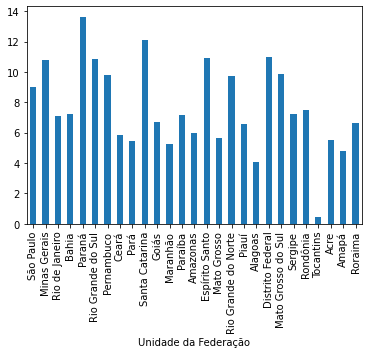

In [17]:
gastos_e_populacao['gasto_por_hab'].plot(kind='bar')

### Desafio 1: Colocar legendas, títulos, formatar eixos e ordenar do maior para o menor

In [18]:
gastos_e_populacao.sort_values('gasto_por_hab', ascending=False, inplace=True)

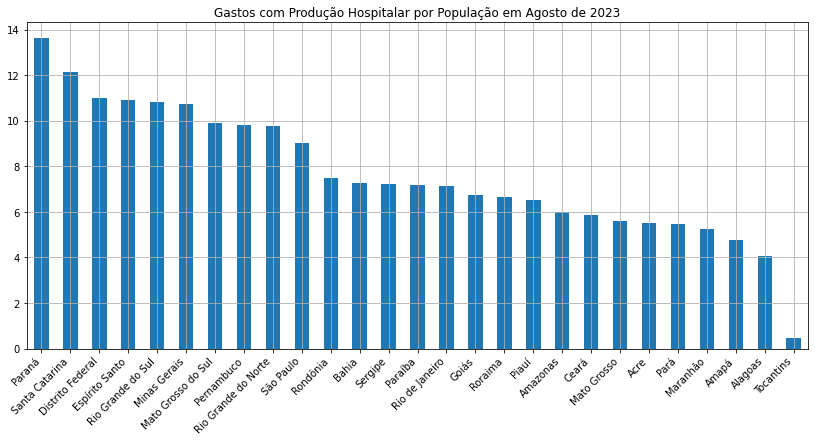

In [19]:
import matplotlib.pyplot as plt

gastos_e_populacao['gasto_por_hab'] = gastos_e_populacao['gasto_por_hab'].sort_values(ascending=False)

gastos_e_populacao['gasto_por_hab'].plot(kind='bar',figsize=(14,6),grid=True)
plt.title('Gastos com Produção Hospitalar por População em Agosto de 2023')
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.show()

### Desafio 2: Colocar uma linha horizontal com a média de todos os gastos por população

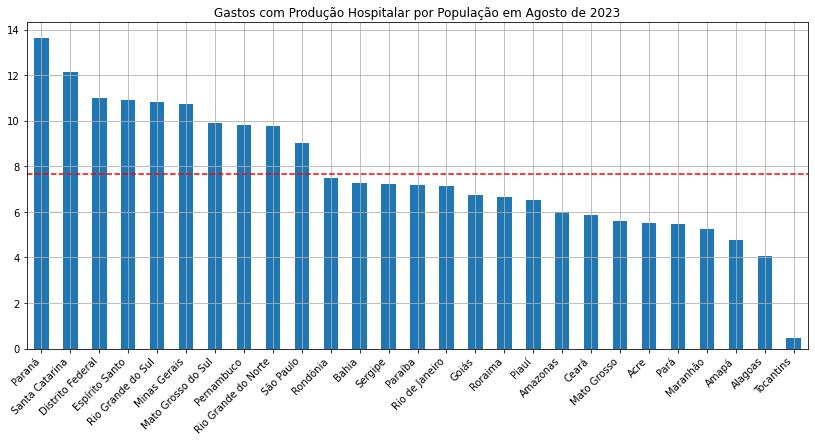

In [20]:
import matplotlib.pyplot as plt

gastos_e_populacao['gasto_por_hab'] = gastos_e_populacao['gasto_por_hab'].sort_values(ascending=False)

gastos_e_populacao['gasto_por_hab'].plot(kind='bar',figsize=(14,6),grid=True)
plt.title('Gastos com Produção Hospitalar por População em Agosto de 2023')
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.axhline(gastos_e_populacao['gasto_por_hab'].mean(), linestyle='--', color='red')
plt.show()

------

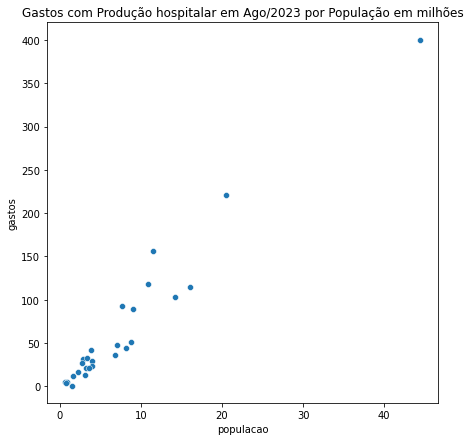

In [21]:
import seaborn as sns

plt.figure(figsize=(7,7))
plt.ylabel('gastos')
plt.title('Gastos com Produção hospitalar em Ago/2023 por População em milhões')
sns.scatterplot(data = gastos_e_populacao / 1000000, x = 'populacao', y = '2023/Ago')
plt.show()

### Desafio 3: faça o mesmo plot para o penúltimo mês

In [22]:
gastos_prod_hosp = pd.read_csv('dados/gastos_prod_hosp.csv')
gastos_prod_hosp.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2022/Nov,2022/Dez,2023/Jan,2023/Fev,2023/Mar,2023/Abr,2023/Mai,2023/Jun,2023/Jul,2023/Ago
0,35 São Paulo,91.678473,148.677527,156.087269,161.227125,187.119398,187.291126,194.398399,184.854516,188.636360,...,356.542924,351.265367,356.626279,335.629832,377.858406,354.160470,365.197239,387.466241,384.882699,400.547554
1,31 Minas Gerais,45.671660,70.194037,79.231337,77.136538,80.554441,94.758523,85.360064,84.722528,84.601758,...,194.518172,207.421645,194.617740,179.424591,211.803367,197.315605,210.629269,215.243310,217.545152,220.788839
2,41 Paraná,38.266347,55.384671,53.801319,52.460307,54.419621,57.811688,58.094242,56.982775,57.549082,...,129.855131,151.285153,138.757581,136.826141,148.652956,142.057217,151.650812,146.345424,149.670849,156.008695
3,43 Rio Grande do Sul,30.931325,57.363420,51.547794,56.673338,48.397733,52.413430,56.636377,56.113055,55.356224,...,107.815960,109.417241,111.659794,99.589870,111.407034,106.960122,112.365113,113.734410,116.903978,117.940448
4,33 Rio de Janeiro,23.025259,28.394311,44.567063,44.054605,44.911021,48.056212,49.872379,50.912707,49.270353,...,107.642426,107.407251,107.582771,99.096733,113.917757,108.881459,118.845758,118.755282,124.227851,114.395381


In [23]:
gastos_prod_hosp.set_index('Unidade da Federação', inplace = True)
gastos_ultimos_dois = gastos_prod_hosp[['2023/Jul', '2023/Ago']]
gastos_ultimos_dois.index = gastos_ultimos_dois.index.str[3:]
gastos_ultimos_dois.head()

,2023/Jul,2023/Ago
Unidade da Federação,,
São Paulo,384.882699,400.547554
Minas Gerais,217.545152,220.788839
Paraná,149.670849,156.008695
Rio Grande do Sul,116.903978,117.940448
Rio de Janeiro,124.227851,114.395381


In [24]:
gastos_e_populacao2 = dados_ibge_tab.join(gastos_ultimos_dois)
gastos_e_populacao2.head()

,populacao,2023/Jul,2023/Ago
Unidade da Federação,,,
São Paulo,44411238,384.882699,400.547554
Minas Gerais,20538718,217.545152,220.788839
Rio de Janeiro,16054524,124.227851,114.395381
Bahia,14141626,106.032225,102.561512
Paraná,11444380,149.670849,156.008695


In [25]:
gastos_e_populacao2['populacao'] = gastos_e_populacao2['populacao'] / 1000000
gastos_e_populacao2.head()

,populacao,2023/Jul,2023/Ago
Unidade da Federação,,,
São Paulo,44.411238,384.882699,400.547554
Minas Gerais,20.538718,217.545152,220.788839
Rio de Janeiro,16.054524,124.227851,114.395381
Bahia,14.141626,106.032225,102.561512
Paraná,11.444380,149.670849,156.008695


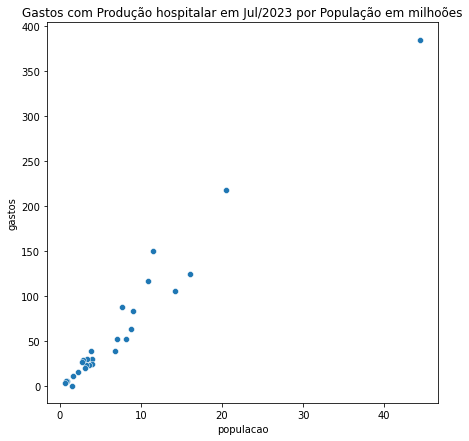

In [26]:
import seaborn as sns

plt.figure(figsize=(7,7))
plt.ylabel('gastos')
plt.title('Gastos com Produção hospitalar em Jul/2023 por População em milhoões')
sns.scatterplot(data = gastos_e_populacao2, x = 'populacao', y = '2023/Jul')
plt.show()

### Desafio 4: Faça os dois gráficos dos últimos dois meses no mesmo plot:

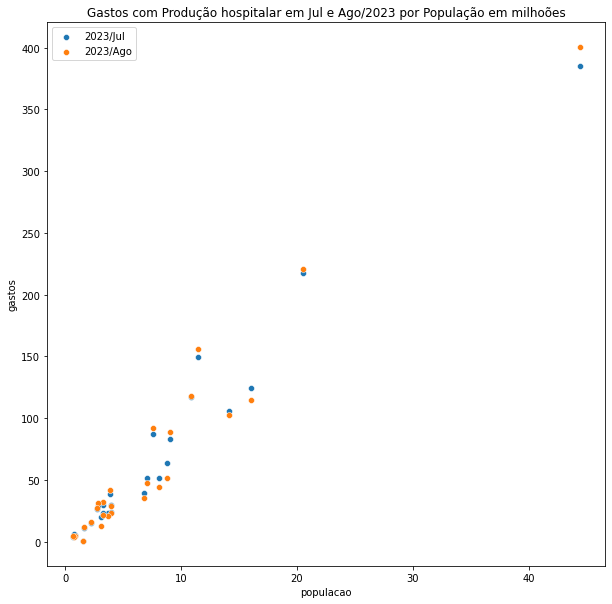

In [27]:
plt.figure(figsize=(10,10))
plt.ylabel('gastos')
plt.title('Gastos com Produção hospitalar em Jul e Ago/2023 por População em milhoões')
sns.scatterplot(data = gastos_e_populacao2, x = 'populacao', y = '2023/Jul',label='2023/Jul')
sns.scatterplot(data = gastos_e_populacao2, x = 'populacao', y = '2023/Ago',label='2023/Ago')
plt.show()

------

### Criando funções para plotar gráficos mais rapidamente:

In [28]:
gastos_prod_hosp.index = gastos_prod_hosp.index.str[3:].str.strip()

In [29]:
def insere_gastos_e_gastos_por_hab(gastos_prod_hosp,gastos_e_populacao,mes):
    gastos = gastos_prod_hosp[mes]
    gastos_e_populacao[f'gastos_{mes}'] = gastos * 1000000
    gastos_e_populacao[f'gasto_por_hab_{mes}'] = gastos_e_populacao[f'gastos_{mes}'] / gastos_e_populacao['populacao']
    return gastos_e_populacao

In [30]:
gastos_e_populacao = insere_gastos_e_gastos_por_hab(gastos_prod_hosp,gastos_e_populacao,gastos_prod_hosp.columns[-1])
gastos_e_populacao = insere_gastos_e_gastos_por_hab(gastos_prod_hosp,gastos_e_populacao,gastos_prod_hosp.columns[-2])
gastos_e_populacao = insere_gastos_e_gastos_por_hab(gastos_prod_hosp,gastos_e_populacao,gastos_prod_hosp.columns[-3])
gastos_e_populacao.head()

,populacao,2023/Ago,gasto_por_hab,gastos_2023/Ago,gasto_por_hab_2023/Ago,gastos_2023/Jul,gasto_por_hab_2023/Jul,gastos_2023/Jun,gasto_por_hab_2023/Jun
Unidade da Federação,,,,,,,,,
Paraná,11444380,1.560087e+08,13.631904,1.560087e+08,13.631904,1.496708e+08,13.078109,1.463454e+08,12.787536
Santa Catarina,7610361,9.224957e+07,12.121576,9.224957e+07,12.121576,8.734911e+07,11.477657,8.772574e+07,11.527145
Distrito Federal,2817381,3.096124e+07,10.989371,3.096124e+07,10.989371,2.903418e+07,10.305378,2.825858e+07,10.030087
Espírito Santo,3833712,4.182291e+07,10.909245,4.182291e+07,10.909245,3.867649e+07,10.088522,4.231712e+07,11.038157
Rio Grande do Sul,10882965,1.179404e+08,10.837161,1.179404e+08,10.837161,1.169040e+08,10.741924,1.137344e+08,10.450682


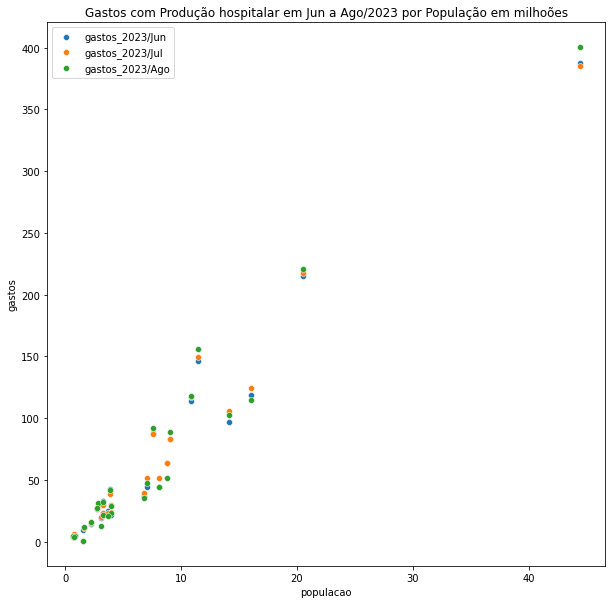

In [31]:
plt.figure(figsize=(10,10))
plt.ylabel('gastos')
plt.title('Gastos com Produção hospitalar em Jun a Ago/2023 por População em milhoões')
sns.scatterplot(data = gastos_e_populacao / 1000000, x = 'populacao', y = 'gastos_2023/Jun',label='gastos_2023/Jun')
sns.scatterplot(data = gastos_e_populacao / 1000000, x = 'populacao', y = 'gastos_2023/Jul',label='gastos_2023/Jul')
sns.scatterplot(data = gastos_e_populacao / 1000000, x = 'populacao', y = 'gastos_2023/Ago',label='gastos_2023/Ago')
plt.show()

Os gastos com produção hospitalar parecem estar aumentando conforme a populacao também aumenta

In [32]:
mensal = gastos_prod_hosp.T
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Mato Grosso,Alagoas,Amazonas,Sergipe,Rondônia,Tocantins,Acre,Roraima,Amapá
2008/Jan,91.678473,45.671660,38.266347,30.931325,23.025259,21.211522,14.393950,16.504913,15.539822,15.310637,...,7.985142,4.795299,6.243726,4.735529,2.780750,1.388528,3.441593,0.902416,0.657890,1.120973
2008/Fev,148.677527,70.194037,55.384671,57.363420,28.394311,28.189305,24.181401,25.651429,25.735102,22.258669,...,10.079928,8.684882,8.376622,7.118991,3.676483,2.931283,4.985689,1.497206,0.777939,1.268740
2008/Mar,156.087269,79.231337,53.801319,51.547794,44.567063,34.181484,29.991303,26.743525,28.724626,21.442516,...,10.298372,7.886243,8.408336,8.196635,5.051474,1.541683,6.205613,1.794028,0.718688,0.974651
2008/Abr,161.227125,77.136538,52.460307,56.673338,44.054605,39.026934,34.806198,27.181488,30.676457,20.921212,...,10.775976,8.794110,9.090795,8.259378,5.046063,1.525315,4.984482,1.730469,0.839994,1.141137
2008/Mai,187.119398,80.554441,54.419621,48.397733,44.911021,42.949567,32.147987,26.845308,30.604453,21.615971,...,10.398361,9.231645,9.338771,7.831400,4.741152,1.645954,5.511002,1.819444,0.862348,0.866346


<AxesSubplot: ylabel='Bahia'>

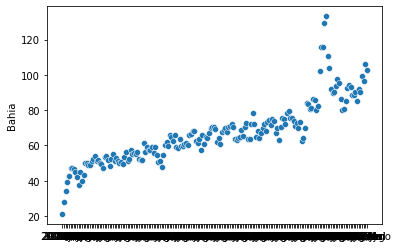

In [33]:
sns.scatterplot(data=mensal, x=mensal.index,y='Bahia')

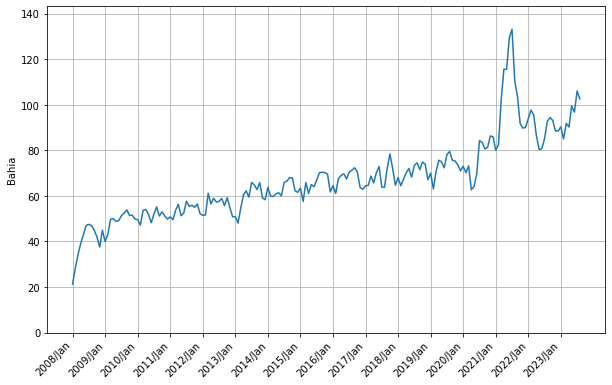

In [34]:
import matplotlib.ticker as ticker

plt.figure(figsize=(10,6))
axis = sns.lineplot(data=mensal, x=mensal.index,y='Bahia')
plt.xticks(rotation=45, ha='right')
axis.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
plt.grid()
plt.ylim(0,mensal['Bahia'].max() + 10)
plt.show()

Provavelmente, quedas em Fervereiro o valor da Produção Hospitalar sempre cai devido o mês ter apenas 28 dias invés de 30 e 31 dias como os demais meses do ano.

### Desafio 5: Fazer o gráfico com dois estados, uma cor diferente para cada Estado

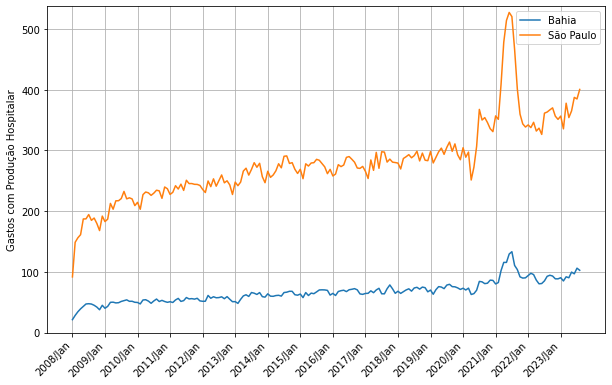

In [35]:
plt.figure(figsize=(10,6))
axis = sns.lineplot(data=mensal, x=mensal.index,y='Bahia', label = 'Bahia')
axis = sns.lineplot(data=mensal, x=mensal.index,y='São Paulo', label = 'São Paulo')
plt.xticks(rotation=45, ha='right')
axis.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
plt.grid()
plt.ylabel('Gastos com Produção Hospitalar')
plt.ylim(0,mensal['São Paulo'].max() + 10)
plt.show()

In [37]:
mensal.index

Index(['2008/Jan', '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai', '2008/Jun',
       '2008/Jul', '2008/Ago', '2008/Set', '2008/Out',
       ...
       '2022/Nov', '2022/Dez', '2023/Jan', '2023/Fev', '2023/Mar', '2023/Abr',
       '2023/Mai', '2023/Jun', '2023/Jul', '2023/Ago'],
      dtype='object', length=188)

In [38]:
from datetime import date

meses = {
    'Jan' : 1,
    'Fev' : 2,
    'Mar' : 3,
    'Abr' : 4,
    'Mai' : 5,
    'Jun' : 6,
    'Jul' : 7,
    'Ago' : 8,
    'Set' : 9,
    'Out' : 10,
    'Nov' : 11,
    'Dez' : 12
}

def para_dia(ano_mes):
    ano = int(ano_mes[:4])
    mes_como_string = ano_mes[5:]
    mes = meses[mes_como_string]
    return date(ano, mes, 1)

In [39]:
mensal.index.map(para_dia)

Index([2008-01-01, 2008-02-01, 2008-03-01, 2008-04-01, 2008-05-01, 2008-06-01,
       2008-07-01, 2008-08-01, 2008-09-01, 2008-10-01,
       ...
       2022-11-01, 2022-12-01, 2023-01-01, 2023-02-01, 2023-03-01, 2023-04-01,
       2023-05-01, 2023-06-01, 2023-07-01, 2023-08-01],
      dtype='object', length=188)

In [40]:
mensal.index = mensal.index.map(para_dia)
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Mato Grosso,Alagoas,Amazonas,Sergipe,Rondônia,Tocantins,Acre,Roraima,Amapá
2008-01-01,91.678473,45.671660,38.266347,30.931325,23.025259,21.211522,14.393950,16.504913,15.539822,15.310637,...,7.985142,4.795299,6.243726,4.735529,2.780750,1.388528,3.441593,0.902416,0.657890,1.120973
2008-02-01,148.677527,70.194037,55.384671,57.363420,28.394311,28.189305,24.181401,25.651429,25.735102,22.258669,...,10.079928,8.684882,8.376622,7.118991,3.676483,2.931283,4.985689,1.497206,0.777939,1.268740
2008-03-01,156.087269,79.231337,53.801319,51.547794,44.567063,34.181484,29.991303,26.743525,28.724626,21.442516,...,10.298372,7.886243,8.408336,8.196635,5.051474,1.541683,6.205613,1.794028,0.718688,0.974651
2008-04-01,161.227125,77.136538,52.460307,56.673338,44.054605,39.026934,34.806198,27.181488,30.676457,20.921212,...,10.775976,8.794110,9.090795,8.259378,5.046063,1.525315,4.984482,1.730469,0.839994,1.141137
2008-05-01,187.119398,80.554441,54.419621,48.397733,44.911021,42.949567,32.147987,26.845308,30.604453,21.615971,...,10.398361,9.231645,9.338771,7.831400,4.741152,1.645954,5.511002,1.819444,0.862348,0.866346


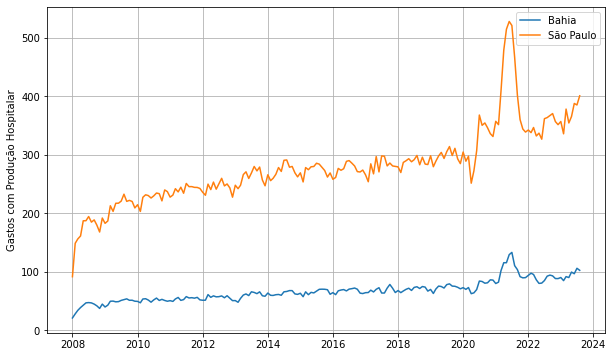

In [43]:
plt.figure(figsize=(10,6))
axis = sns.lineplot(data=mensal, x=mensal.index,y='Bahia', label = 'Bahia')
axis = sns.lineplot(data=mensal, x=mensal.index,y='São Paulo', label = 'São Paulo')
#plt.xticks(rotation=45, ha='right')
#axis.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
plt.grid()
plt.ylabel('Gastos com Produção Hospitalar')
#plt.ylim(0,mensal['São Paulo'].max() + 10)
plt.show()

In [46]:
mensal

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Mato Grosso,Alagoas,Amazonas,Sergipe,Rondônia,Tocantins,Acre,Roraima,Amapá
2008-01-01,91.678473,45.671660,38.266347,30.931325,23.025259,21.211522,14.393950,16.504913,15.539822,15.310637,...,7.985142,4.795299,6.243726,4.735529,2.780750,1.388528,3.441593,0.902416,0.657890,1.120973
2008-02-01,148.677527,70.194037,55.384671,57.363420,28.394311,28.189305,24.181401,25.651429,25.735102,22.258669,...,10.079928,8.684882,8.376622,7.118991,3.676483,2.931283,4.985689,1.497206,0.777939,1.268740
2008-03-01,156.087269,79.231337,53.801319,51.547794,44.567063,34.181484,29.991303,26.743525,28.724626,21.442516,...,10.298372,7.886243,8.408336,8.196635,5.051474,1.541683,6.205613,1.794028,0.718688,0.974651
2008-04-01,161.227125,77.136538,52.460307,56.673338,44.054605,39.026934,34.806198,27.181488,30.676457,20.921212,...,10.775976,8.794110,9.090795,8.259378,5.046063,1.525315,4.984482,1.730469,0.839994,1.141137
2008-05-01,187.119398,80.554441,54.419621,48.397733,44.911021,42.949567,32.147987,26.845308,30.604453,21.615971,...,10.398361,9.231645,9.338771,7.831400,4.741152,1.645954,5.511002,1.819444,0.862348,0.866346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-01,354.160470,197.315605,142.057217,106.960122,108.881459,90.236668,75.790932,81.837177,63.864022,45.980415,...,20.132370,21.402520,16.186148,19.481466,13.520882,10.446755,9.961576,4.701183,4.456290,4.087812
2023-05-01,365.197239,210.629269,151.650812,112.365113,118.845758,99.539041,81.519974,86.454130,65.267968,49.790475,...,22.614252,23.338855,18.385074,21.612306,15.764166,13.746438,11.422730,4.845007,4.435043,6.327228
2023-06-01,387.466241,215.243310,146.345424,113.734410,118.755282,96.755309,83.108908,87.725736,63.347541,44.022665,...,22.877162,24.561740,19.088608,21.633967,14.611514,11.211830,9.166469,5.124899,3.817362,3.497928
2023-07-01,384.882699,217.545152,149.670849,116.903978,124.227851,106.032225,83.070437,87.349111,63.565259,51.776016,...,22.943409,23.500893,20.051611,24.123329,15.146271,10.991850,0.473728,5.692794,3.402211,5.812496


In [70]:
mensal_aberto = mensal.reset_index().melt(id_vars=['index'], value_vars=mensal.columns)
mensal_aberto.columns = ['dia_mes_ano', 'uf', 'gasto']
mensal_aberto.head()

,dia_mes_ano,uf,gasto
0,2008-01-01,São Paulo,91.678473
1,2008-02-01,São Paulo,148.677527
2,2008-03-01,São Paulo,156.087269
3,2008-04-01,São Paulo,161.227125
4,2008-05-01,São Paulo,187.119398


### Desafio 6: Escolher uma paleta adequada para o gráfico, plotar todas as unidades de federação, formatar legendas e eixos

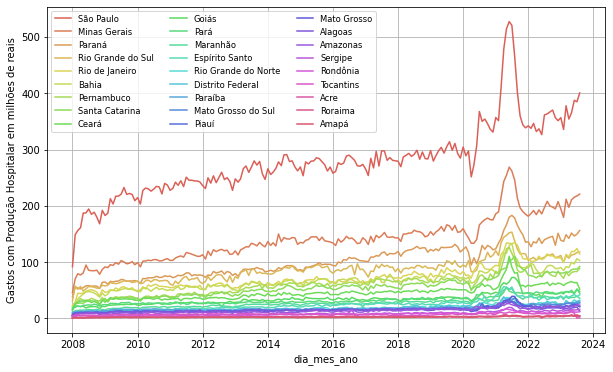

In [71]:
plt.figure(figsize=(10,6))
axis = sns.lineplot(data=mensal_aberto, x='dia_mes_ano',y='gasto', hue='uf',palette='hls')
plt.grid()
plt.ylabel('Gastos com Produção Hospitalar em milhões de reais')
plt.legend(ncols=3, fontsize='small')
plt.show()

---------------------

In [72]:
mensal_aberto['dia_mes_ano'][0]

datetime.date(2008, 1, 1)

In [73]:
mensal_aberto['dia_mes_ano'][0].year

2008

In [76]:
mensal_aberto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5076 entries, 0 to 5075
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dia_mes_ano  5076 non-null   object 
 1   uf           5076 non-null   object 
 2   gasto        5075 non-null   float64
dtypes: float64(1), object(2)
memory usage: 119.1+ KB


In [80]:
mensal_aberto['dia_mes_ano'] = pd.to_datetime(mensal_aberto['dia_mes_ano'])

In [82]:
mensal_aberto['ano'] = mensal_aberto['dia_mes_ano'].dt.year
mensal_aberto['mes'] = mensal_aberto['dia_mes_ano'].dt.month
mensal_aberto.head()

,dia_mes_ano,uf,gasto,ano,mes
0,2008-01-01,São Paulo,91.678473,2008,1
1,2008-02-01,São Paulo,148.677527,2008,2
2,2008-03-01,São Paulo,156.087269,2008,3
3,2008-04-01,São Paulo,161.227125,2008,4
4,2008-05-01,São Paulo,187.119398,2008,5


In [83]:
mensal_aberto.query('uf == "São Paulo"')

,dia_mes_ano,uf,gasto,ano,mes
0,2008-01-01,São Paulo,91.678473,2008,1
1,2008-02-01,São Paulo,148.677527,2008,2
2,2008-03-01,São Paulo,156.087269,2008,3
3,2008-04-01,São Paulo,161.227125,2008,4
4,2008-05-01,São Paulo,187.119398,2008,5
...,...,...,...,...,...
183,2023-04-01,São Paulo,354.160470,2023,4
184,2023-05-01,São Paulo,365.197239,2023,5
185,2023-06-01,São Paulo,387.466241,2023,6
186,2023-07-01,São Paulo,384.882699,2023,7


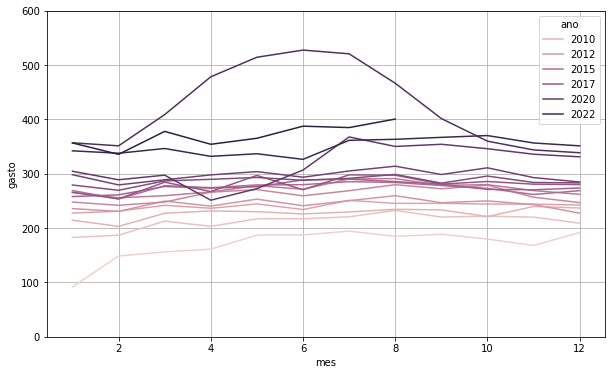

In [85]:
plt.figure(figsize=(10,6))
axis = sns.lineplot(data=mensal_aberto.query('uf == "São Paulo"'), x = 'mes', y = 'gasto', hue = 'ano')
plt.ylim(0,600)
plt.grid()
plt.show()

### Desafio 7: Escolher um ano e plotar o mesmo ano para dois estados diferentes no mesmo gráfico

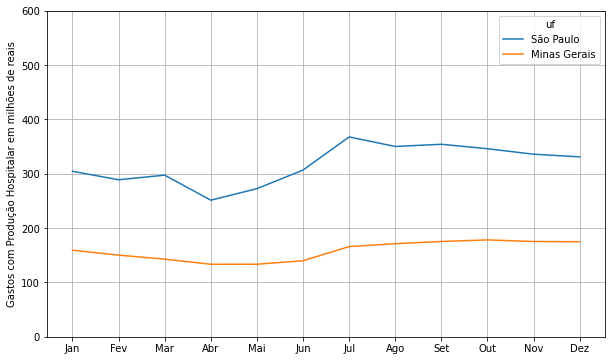

In [97]:
import numpy as np

plt.figure(figsize=(10,6))
axis = sns.lineplot(data=mensal_aberto.query('(uf == "São Paulo" | uf == "Minas Gerais") & (ano == 2020)'), x = 'mes', y = 'gasto', hue = 'uf')
plt.ylim(0,600)
plt.ylabel('Gastos com Produção Hospitalar em milhões de reais')
plt.xlabel('')
plt.xticks(np.arange(1, 13, step=1),labels=meses)
plt.grid()
plt.show()

-----------

In [99]:
dias_por_mes = {
    1:31,
    2:28,
    3:31,
    4:30,
    5:31,
    6:30,
    7:31,
    8:31,
    9:30,
    10:31,
    11:30,
    12:31
}

In [100]:
mensal_aberto['gasto_diario'] = mensal_aberto['gasto'] / mensal_aberto['mes'].map(dias_por_mes)
mensal_aberto.head()

,dia_mes_ano,uf,gasto,ano,mes,gasto_diario
0,2008-01-01,São Paulo,91.678473,2008,1,2.957370
1,2008-02-01,São Paulo,148.677527,2008,2,5.309912
2,2008-03-01,São Paulo,156.087269,2008,3,5.035073
3,2008-04-01,São Paulo,161.227125,2008,4,5.374238
4,2008-05-01,São Paulo,187.119398,2008,5,6.036110


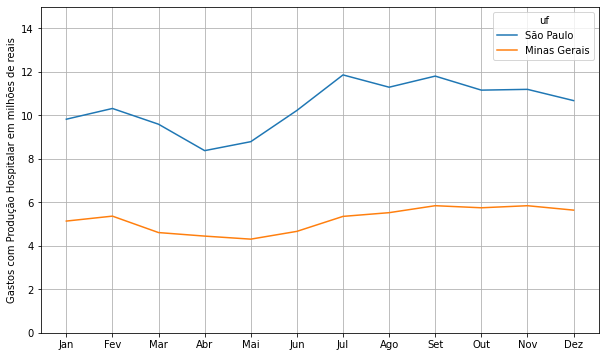

In [103]:
import numpy as np

plt.figure(figsize=(10,6))
axis = sns.lineplot(data=mensal_aberto.query('(uf == "São Paulo" | uf == "Minas Gerais") & (ano == 2020)'), x = 'mes', y = 'gasto_diario', hue = 'uf')
plt.ylim(0,15)
plt.ylabel('Gastos com Produção Hospitalar em milhões de reais')
plt.xlabel('')
plt.xticks(np.arange(1, 13, step=1),labels=meses)
plt.grid()
plt.show()